In [2]:
import sys
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

from feature_format import featureFormat, targetFeatureSplit

from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report,confusion_matrix

### Selecting Features to Use

In [7]:
features_list = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 
                 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 
                 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 
                 'restricted_stock', 'director_fees', 'to_messages', 
                'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                'shared_receipt_with_poi']

print('\nFeatures:',features_list,sep='\n')
print('\nFeatures Used:',len(features_list))


Features:
['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

Features Used: 20


### Load the dictionary containing the dataset

In [4]:
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

### Remove outliers

In [5]:
# I first used the following code to find the outliers, these features are known for most people (refer: attached enroninsiderpay pdf)
"""
max_outlier = max(data_dict, key= lambda k: data_dict[k]['salary'] + data_dict[k]['bonus'] + data_dict[k]['total_payments'] + data_dict[k]['total_stock_value'] if (data_dict[k]['salary']!='NaN' and data_dict[k]['bonus']!='NaN' and data_dict[k]['total_payments']!='NaN' and data_dict[k]['total_stock_value']!='NaN') else 0)
print('Outlier:',max_outlier)
print('Salary:', data_dict[max_outlier]['salary'])
print('Bonus:', data_dict[max_outlier]['bonus'])
data_dict.pop(max_outlier)
"""

# In the enron insider pay pdf, there is only one extreme outlier, hence the following is also sufficient
data_dict.pop('TOTAL')

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [8]:
# total NaN values fo reach poi
check_poi_NaN = {}
for feature in features_list:
    check_poi_NaN[feature] = 0

# total values for each feature as tuples (poi, non-poi)
features_values = {}
for feature in features_list:
    features_values[feature] = [0,0]
print("\nmissing features per person:")
# number of hidden values per person and the most hidden value among all known poi's
for person in data_dict:
    count = 0
    for feature in features_list:
        if data_dict[person][feature] == 'NaN':
            # print(feature, end=', ')
            count+=1
            if data_dict[person]['poi']:
                check_poi_NaN[feature] += 1
        else:
            if data_dict[person]['poi']:
                features_values[feature][0]+=data_dict[person][feature]
            else:
                features_values[feature][1]+=data_dict[person][feature]
    print(f'{person}:',count,'poi:',data_dict[person]['poi'],'\n')


missing features per person:
METTS MARK: 7 poi: False 

BAXTER JOHN C: 8 poi: False 

ELLIOTT STEVEN: 10 poi: False 

CORDES WILLIAM R: 11 poi: False 

HANNON KEVIN P: 4 poi: True 

MORDAUNT KRISTINA M: 12 poi: False 

MEYER ROCKFORD G: 9 poi: False 

MCMAHON JEFFREY: 5 poi: False 

HAEDICKE MARK E: 2 poi: False 

PIPER GREGORY F: 3 poi: False 

HUMPHREY GENE E: 8 poi: False 

NOLES JAMES L: 14 poi: False 

BLACHMAN JEREMY M: 5 poi: False 

SUNDE MARTIN: 7 poi: False 

GIBBS DANA R: 9 poi: False 

LOWRY CHARLES P: 15 poi: False 

COLWELL WESLEY: 5 poi: True 

MULLER MARK S: 4 poi: False 

JACKSON CHARLENE R: 6 poi: False 

WESTFAHL RICHARD K: 11 poi: False 

WALTERS GARETH W: 14 poi: False 

WALLS JR ROBERT H: 5 poi: False 

KITCHEN LOUISE: 6 poi: False 

CHAN RONNIE: 15 poi: False 

BELFER ROBERT: 13 poi: False 

SHANKMAN JEFFREY A: 5 poi: False 

WODRASKA JOHN: 17 poi: False 

BERGSIEKER RICHARD P: 5 poi: False 

URQUHART JOHN A: 15 poi: False 

BIBI PHILIPPE A: 5 poi: False 

RIEKE

### Data Exploration

number of people in the dataset: 145

number of culpable people (known poi's): 18
number of features used: 22 

features with missing values: ['salary', 'deferral_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

most poi's are hiding their: restricted_stock_deferred

features with maximum differences between poi's and non-poi's:
['exercised_stock_options', 'loan_advances', 'restricted_stock']
[5610902.121609799, 4510269.028871391, 1515378.0039370079]


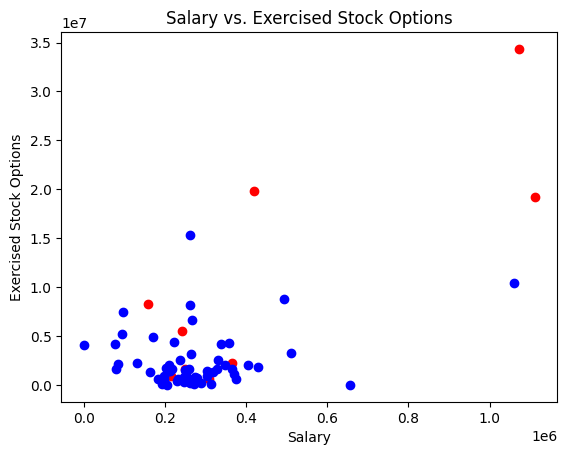

In [15]:
print("number of people in the dataset:",len(data_dict))
print()
print("number of culpable people (known poi's):",len([person for person in data_dict if data_dict[person]['poi']]))
print("number of features used:",len(features_list),'\n')
print("features with missing values:",[key for key in check_poi_NaN if check_poi_NaN[key]!=0],'\n')
print("most poi's are hiding their:",max(check_poi_NaN,key= lambda k: check_poi_NaN[k]))
print()
total_feature_values = list(features_values.values())

# taking absolute value for features based on negative defered values 
feature_differences = [abs(i[0])/len([person for person in data_dict if data_dict[person]['poi']]) - abs(i[1])/(len(data_dict) - len([person for person in data_dict if data_dict[person]['poi']])) for i in total_feature_values ]
max_dif_features = []

for i in sorted(feature_differences,reverse=True): max_dif_features+=[features_list[feature_differences.index(i)]]

print("features with maximum differences between poi's and non-poi's:")
print(max_dif_features[2:5])
print(sorted(feature_differences,reverse=True)[2:5])
# I observed that on average the exercised stock options of poi's are much larger than that of non-poi's

# plotting this feature against their salary
x_values_poi = [data_dict[person]['salary'] for person in data_dict if data_dict[person]['poi'] and data_dict[person]['salary']!='NaN' and data_dict[person]['exercised_stock_options']!='NaN']
y_values_poi = [data_dict[person]['exercised_stock_options'] for person in data_dict if data_dict[person]['poi'] and data_dict[person]['salary']!='NaN' and data_dict[person]['exercised_stock_options']!='NaN']
x_values_not_poi = [data_dict[person]['salary'] for person in data_dict if not data_dict[person]['poi'] and data_dict[person]['salary']!='NaN' and data_dict[person]['exercised_stock_options']!='NaN']
y_values_not_poi = [data_dict[person]['exercised_stock_options'] for person in data_dict if not data_dict[person]['poi'] and data_dict[person]['salary']!='NaN' and data_dict[person]['exercised_stock_options']!='NaN']
plt.scatter(x_values_poi, y_values_poi, color='r', marker='o', label='poi')
plt.scatter(x_values_not_poi, y_values_not_poi, color='b', marker='o', label='not poi')
plt.xlabel('Salary')
plt.ylabel('Exercised Stock Options')
plt.title('Salary vs. Exercised Stock Options')
plt.show()

### Create New Features

In [16]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

# I'm creating two new features. One stores the proportion of messages sent to poi's and the other stores the proportion of messages received from poi's
for person in my_dataset:
    if my_dataset[person]['from_this_person_to_poi']!='NaN' and my_dataset[person]['from_messages']!='NaN':
        my_dataset[person]['ratio_to_poi'] = my_dataset[person]['from_this_person_to_poi']/my_dataset[person]['from_messages']
    else:
        my_dataset[person]['ratio_to_poi'] = 0
    if my_dataset[person]['from_poi_to_this_person']!='NaN' and my_dataset[person]['to_messages']!='NaN':
        my_dataset[person]['ratio_from_poi'] = my_dataset[person]['from_poi_to_this_person']/my_dataset[person]['to_messages']
    else:
        my_dataset[person]['ratio_from_poi'] = 0
features_list.extend(['ratio_from_poi','ratio_to_poi'])


### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Feature Selection

In [17]:
# selecting 8 best features
kn = 9
k_best = SelectKBest(k=kn)
k_best.fit(features,labels)

feature_score_array = [(features_list[i+1],k_best.scores_[i]) for i in range(len(k_best.scores_))]
feature_score_array = sorted(feature_score_array, key=lambda x: x[1],reverse=True)

k_best_features,k_best_features_scores = zip(*feature_score_array)
k_best_features,k_best_features_scores = k_best_features[:kn-1],k_best_features_scores[:kn-1]

print()
print("selected features:",k_best_features,'\n')
print("scores:",k_best_features_scores,'\n')

# recreating features and labels with new selected features
data = featureFormat(my_dataset, ('poi',)+k_best_features, sort_keys = True)
labels, features = targetFeatureSplit(data)


selected features: ('exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'ratio_to_poi', 'ratio_to_poi', 'deferred_income', 'long_term_incentive') 

scores: (25.09754152873549, 24.4676540475264, 21.06000170753657, 18.575703268041785, 16.64170707046899, 16.64170707046899, 11.5955476597306, 10.072454529369441) 



### Trying a Variety of Classfiers

In [11]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


clf.fit(features_train,labels_train)
print("Gaussian Naive Bayes")
pred = clf.predict(features_test)
print(classification_report(labels_test,pred))

# performance without parameter tuning:
#               precision    recall  f1-score   support

#          0.0       0.92      0.94      0.93        36
#          1.0       0.60      0.50      0.55         6

#     accuracy                           0.88        42
#    macro avg       0.76      0.72      0.74        42
# weighted avg       0.87      0.88      0.88        42

from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(features_train,labels_train)
print("Support Vector Classification")
pred = clf.predict(features_test)
print(classification_report(labels_test,pred))


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=2)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print("Decision Tree Classifier")
print(classification_report(labels_test,pred))

#               precision    recall  f1-score   support

#          0.0       0.94      0.89      0.91        36
#          1.0       0.50      0.67      0.57         6

#     accuracy                           0.86        42
#    macro avg       0.72      0.78      0.74        42
# weighted avg       0.88      0.86      0.87        42


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,max_depth=2)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print("Random Forest Classifier")
print(classification_report(labels_test,pred))

#               precision    recall  f1-score   support

#          0.0       0.90      1.00      0.95        36
#          1.0       1.00      0.33      0.50         6

#     accuracy                           0.90        42
#    macro avg       0.95      0.67      0.72        42
# weighted avg       0.91      0.90      0.88        42

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print("Classifier Implementing the K-Nearest Neighbors Vote:")
print(classification_report(labels_test,pred))

#               precision    recall  f1-score   support

#          0.0       0.90      1.00      0.95        36
#          1.0       1.00      0.33      0.50         6

#     accuracy                           0.90        42
#    macro avg       0.95      0.67      0.72        42
# weighted avg       0.91      0.90      0.88        42

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=40, random_state=0)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print("AdaBoost Classifier:")
print(classification_report(labels_test,pred))

#               precision    recall  f1-score   support

#          0.0       0.92      0.94      0.93        36
#          1.0       0.60      0.50      0.55         6

#     accuracy                           0.88        42
#    macro avg       0.76      0.72      0.74        42
# weighted avg       0.87      0.88      0.88        42

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        36
         1.0       0.60      0.50      0.55         6

    accuracy                           0.88        42
   macro avg       0.76      0.72      0.74        42
weighted avg       0.87      0.88      0.88        42

Support Vector Classification
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        36
         1.0       0.00      0.00      0.00         6

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42

Decision Tree Classifier
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91        36
         1.0       0.50      0.67      0.57         6

    accuracy                           0.86        42
   macro avg       0.72      0.78      0.74        4

/Users/aryannath/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aryannath/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aryannath/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tuning Parameters

In [12]:
def bestParams(clf,cv,param_grid,score):
    '''
    This function takes a classifier, features, target variable, paramter grid (for grid search) 
    and fits and scores the resulting model.
    A confusion matrix and classification report is returned 
    with the performance metrics.
    Takes inspiration from:  http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html
    And the know how to tune gridsearch from:
    https://www.kaggle.com/kevinarvai/fine-tuning-a-classifier-in-scikit-learn
    '''
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
   
    skf = StratifiedKFold(n_splits=cv)
    
    if param_grid != None:
        clf = GridSearchCV(clf, param_grid=param_grid, cv=skf,
                           scoring=score,
                           return_train_score=True, n_jobs=-1)
        clf.fit(features_train, labels_train)
     
        print()
        print("best parameters:")
        print(clf.best_params_)
        bestP = clf.best_params_
    else:
        clf.fit(features_train, labels_train)
        bestP= []
    return bestP

print("Parameter Tuned Classifiers:")

print("\nDecision Tree Classifer:")

clf = DecisionTreeClassifier()

param_grid = [{'criterion': ['gini'],
  'splitter': ['best'],
  'max_depth': [None, 1, 2, 3, 4, 5],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'random_state': [0, 42, 123]},
 {'criterion': ['entropy'],
  'splitter': ['best'],
  'max_depth': [None, 1, 2, 3, 4, 5],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'random_state': [0, 42, 123]},
  {'criterion': ['gini'],
  'splitter': ['random'],
  'max_depth': [None, 1, 2, 3, 4, 5],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'random_state': [0, 42, 123]}]

bestParameters = bestParams(clf,10,param_grid,"recall")
clf = DecisionTreeClassifier(**bestParameters)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print(classification_report(labels_test,pred))
print(confusion_matrix(labels_test,pred))


print("\nAdaBoost Classifier:")
clf = AdaBoostClassifier()

param_grid = [{'algorithm':['SAMME'],
                'n_estimators':[25,35,40,50,75,100],
                'learning_rate':[0.1,0.25,0.5,0.75,1]},
                {'algorithm':['SAMME.R'],
                'n_estimators':[25,35,40,50,75,100],
                'learning_rate':[0.1,0.25,0.5,0.75,1]}]

bestParameters = bestParams(clf,10,param_grid,"recall")
clf = AdaBoostClassifier(**bestParameters)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print(classification_report(labels_test,pred))
print(confusion_matrix(labels_test,pred))


print("\nRandom Forest Classifier:")
clf = RandomForestClassifier()

param_grid = [{'n_estimators': [10, 50, 100, 200],
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 5, 10, 15, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'random_state': [0, 42, 123]},
 {'n_estimators': [10, 50, 100, 200],
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 25, 30, 35, 40],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'random_state': [0, 42, 123]}]

bestParameters = bestParams(clf,10,param_grid,"recall")
clf = RandomForestClassifier(**bestParameters)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print(classification_report(labels_test,pred))
print(confusion_matrix(labels_test,pred))


print("\nClassifier Implementing the K-Nearest Neighbors Vote:")
clf = KNeighborsClassifier()

param_grid = [{'n_neighbors': [3, 5, 7, 9, 11],
  'weights': ['uniform', 'distance'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'p': [1, 2]},
 {'n_neighbors': [13, 15, 17, 19, 21],
  'weights': ['uniform', 'distance'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'p': [1, 2]}]

bestParameters = bestParams(clf,10,param_grid,"recall")
clf = KNeighborsClassifier(**bestParameters)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print(classification_report(labels_test,pred))
print(confusion_matrix(labels_test,pred))

Parameter Tuned Classifiers:

Decision Tree Classifer:

best parameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'random'}
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88        36
         1.0       0.40      0.67      0.50         6

    accuracy                           0.81        42
   macro avg       0.67      0.75      0.69        42
weighted avg       0.86      0.81      0.83        42

[[30  6]
 [ 2  4]]

AdaBoost Classifier:

best parameters:
{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 25}
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        36
         1.0       0.50      0.50      0.50         6

    accuracy                           0.86        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.86      0.86      0.86        42

[[33  3]
 [ 3  3]]

Ra

In [14]:
# TODO: new feature - counter for occurence of stem words found very commonly in emails between known poi's